In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

In [30]:
###### import libraries
import librosa
import wave
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import rmsprop

In [20]:
def extract_mfcc(wav_file_name):
    '''This function extracts mfcc features and obtain the mean of each dimension
    Input : path_to_wav_file
    Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
#     trimmed_data = np.zeros((160, 20))
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
#     data = np.array(librosa.feature.mfcc(y = y, sr = sr, n_mfcc=40).T)
#     if data.shape[0] <= 160:
#         trimmed_data[:data.shape[0],0:] = data[:,0:]
#     else:
#         trimmed_data[0:,0:] = data[0:160,0:]
    return mfccs

In [22]:
##### load data from savee dataset
#### although, we load the data here, it is not used in training or validation
root_dir = "./Audio/audio_speech_actors_01-24"
# root_dir = "../input/audio_speech_actors_01-24/"
savee_data = []
savee_labels = []
for actor_dir in sorted(os.listdir(root_dir)):
    if actor_dir[-4:] == ".txt":
        continue
    for file_name in os.listdir(os.path.join(root_dir, actor_dir)):
        if file_name[0] == "c":
            continue
        wav_file_name = os.path.join(root_dir, actor_dir, file_name)
        savee_data.append(extract_mfcc(wav_file_name))
        if file_name[0] == "n":
            savee_labels.append(0)
        if file_name[0] == "a":
            savee_labels.append(4)
        if file_name[0] == "d":
            savee_labels.append(6)
        if file_name[0] == "f":
            savee_labels.append(5)
        if file_name[0] == "h":
            savee_labels.append(2)
        if file_name[:2] == "sa":
            savee_labels.append(3)
        if file_name[:2] == "su":
            savee_labels.append(7)

In [53]:
#### convert data to array and make labels categorical
try:
    savee_data_array = np.asarray(savee_data)
    savee_label_array = np.array(savee_labels)
    to_categorical(savee_label_array)[0].shape
except ValueError:  #raised if `y` is empty.
    pass
#savee_data_array.shape

In [49]:
# #### combine data
data = np.r_[savee_data_array]
labels = np.r_[savee_label_array]
# data = ravdess_speech_data_array
# labels = ravdess_speech_label_array
labels.shape

(0,)

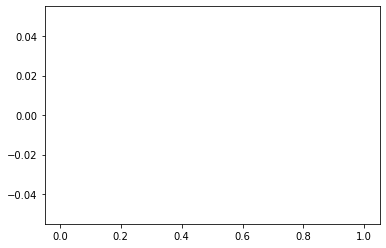

In [50]:
### plot a histogram to understand the distribution of the data
plt.hist(savee_label_array)
plt.show()